## Laboratorio 3
Stefano Aragoni, Carol Arevalo


-------
### Análisis Exploratorio:
- Describir las series de tiempo y visualizarlas

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from IPython.display import display
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Como primer paso, se importaron los diferentes datasets y se les asignó un nombre para poder trabajar con ellos. Se utilizó la función `read_csv` de la librería `pandas` para leer los archivos csv y convertirlos en dataframes.

In [276]:
# Cargar los datos
births = pd.read_csv("data/daily-total-female-births.csv", delimiter=",")
car = pd.read_csv("data/monthly-car-sales.csv", delimiter=",")
temperature = pd.read_csv("data/monthly-mean-temp.csv", delimiter=",")
shampoo = pd.read_csv('data/shampoo.csv', delimiter=",")

Posteriormente, se utilizó la librería `MinMaxScaler` para normalizar los datos de cada dataset. Esto se hizo para poder comparar las series de tiempo de manera más sencilla.

In [277]:
scaler = MinMaxScaler()
scaler.fit(births[['Births']])
births['Births'] = scaler.transform(births[['Births']])

scaler = MinMaxScaler()
scaler.fit(car[['Sales']])
car['Sales'] = scaler.transform(car[['Sales']])

scaler = MinMaxScaler()
scaler.fit(temperature[['Temperature']])
temperature['Temperature'] = scaler.transform(temperature[['Temperature']])

scaler = MinMaxScaler()
scaler.fit(shampoo[['Sales']])
shampoo['Sales'] = scaler.transform(shampoo[['Sales']])

Posteriormente, quiso analizar el contenido de los diferentes datasets. A continuación se presentan las 15 primeras columnas de cada uno de ellos. 

- Como se puede observar, el dataset de *shampoo* usa un formato de fecha diferente. Donde el año es representado por un número de un digito. Como resultado, se debe cambiar el formato de la fecha para poder trabajar con ella.

In [278]:
pd.concat([births.head(15), car.head(15), temperature.head(15), shampoo.head(15)], axis=1)

,Date,Births,Month,Sales,Month,Temperature,Month,Sales
0,1959-01-01,0.24,1960-01,0.047830,1920-01,0.264205,1-01,0.260707
1,1959-01-02,0.18,1960-02,0.153914,1920-02,0.269886,1-02,0.047272
2,1959-01-03,0.14,1960-03,0.314549,1920-03,0.372159,1-03,0.113382
3,1959-01-04,0.16,1960-04,0.429935,1920-04,0.437500,1-04,0.000000
4,1959-01-05,0.42,1960-05,0.439287,1920-05,0.647727,1-05,0.108406
5,1959-01-06,0.12,1960-06,0.400516,1920-06,0.772727,1-06,0.087436
6,1959-01-07,0.44,1960-07,0.191418,1920-07,0.750000,1-07,0.199929
7,1959-01-08,0.40,1960-08,0.130680,1920-08,0.713068,1-08,0.186956
8,1959-01-09,0.30,1960-09,0.072135,1920-09,0.653409,1-09,0.130620
9,1959-01-10,0.08,1960-10,0.193707,1920-10,0.545455,1-10,0.006398


Para solucionar este problema, se cambio el formato de la fecha a un formato de fecha estándar. Para esto, se utilizó la función `apply` de la librería `pandas` para aplicar una función a cada elemento de la columna. En este caso, se utilizó la función `lambda` para aplicar modificar el contenido de cada elemento de la columna.

In [279]:
# Convertir month de shampoo a fecha
shampoo['Month'] = shampoo['Month'].apply(lambda x: ("200"+x.split('-')[0]) + '-' + x.split('-')[1])

shampoo.head(5)

,Month,Sales
0,2001-01,0.260707
1,2001-02,0.047272
2,2001-03,0.113382
3,2001-04,0.000000
4,2001-05,0.108406


Posteriormente, se graficaron las series de tiempo para poder visualizarlas. Para esto, se utilizó la función `plot` de la librería `matplotlib`.

In [280]:
# Cargar la serie de tiempo
ts_births = TimeSeries.from_dataframe(births, 'Date', 'Births')
ts_car = TimeSeries.from_dataframe(car, 'Month', 'Sales')
ts_temperature = TimeSeries.from_dataframe(temperature, 'Month', 'Temperature')
ts_shampoo = TimeSeries.from_dataframe(shampoo, 'Month', 'Sales')

En el caso de la serie de tiempo de nacimientos totales diarios, se puede observar lo siguiente:
- La serie de tiempo tiene una tendencia relativamente estable, con un pequeño aumento en el número de nacimientos entre 06-1959 y 10-1959. Sin embargo, en este caso solo se está analizando un único año, por tal razón, no se puede indicar con mayor precisión si a largo plazo hay un aumento en los nacimientos. 

- En el caso de estacionalidad, se puede observar que hay un aumento en los nacimientos en el mes de junio y un descenso en el mes de octubre. A pesar de que no se puede observar un patrón claro de estacionalidad, al analizar más años posiblemente se pueda observar este patrón más claramente.

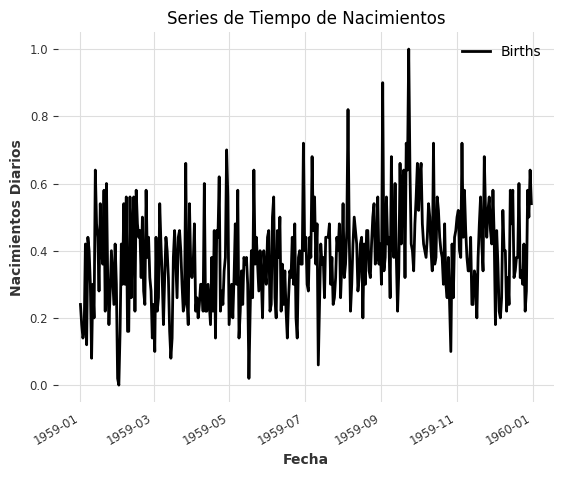

In [281]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_births.plot(ax=ax)

ax.set_title("Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos Diarios")
plt.show()

En el caso de la serie de tiempo de ventas de carros mensuales, se puede observar lo siguiente:
- La serie de tiempo tiene una tendencia ascendente. A pesar de que hay sube y baja en las ventas, se puede observar que a largo plazo hay un aumento en las ventas de carros. Esto debido a que, claramente, cada vez hay más carros en las calles.

- En el caso de estacionalidad, se puede observar que la primera mitad del año hay un aumento en las ventas de carros y en la segunda mitad del año hay un descenso en las ventas de carros. Sin embargo, en la segunda mitad del año, específicamente a principios del 4to trimestre, se puede observar un aumento leve en las ventas de carros.

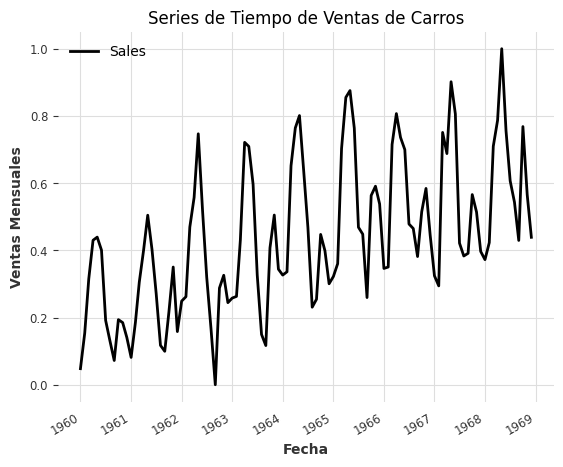

In [282]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_car.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Carros")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

En el caso de la serie de tiempo de  temperaturas promedio mensuales, se puede observar lo siguiente:
- La serie de tiempo tiene una tendencia estable. Es decir, que de los años 1920 a 1940 no hay un cambio significativo en la temperatura promedio. 

- En el caso de estacionalidad, se puede observar que hay un aumento en la temperatura promedio en los meses de verano y un descenso en los meses de invierno. Este representando un patrón, el más obvio incluso, de estacionalidad. 

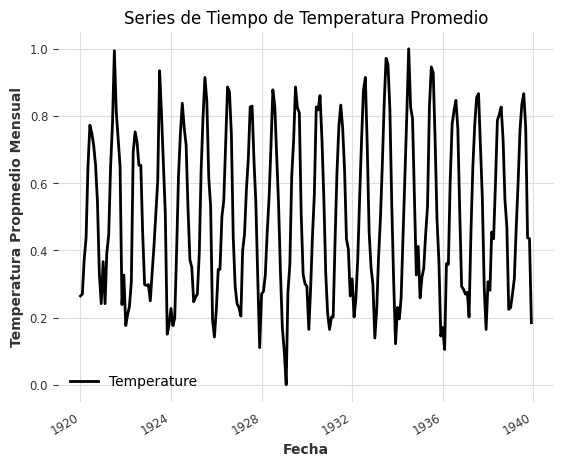

In [283]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_temperature.plot(ax=ax)

ax.set_title("Series de Tiempo de Temperatura Promedio")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura Propmedio Mensual")
plt.show()

En el caso de la serie de tiempo de ventas de shampoo mensuales, se puede observar lo siguiente:
- La serie de tiempo tiene una tendencia ascendente. Esto debido a que se puede observar que hay un aumento en las ventas de shampoo a lo largo del tiempo.

- En el caso de estacionalidad, no se puede observar un patrón claro de estacionalidad. Sin embargo, se puede observar que en ciertos meses (alrededor de septiembre) hay un aumento en las ventas de shampoo.

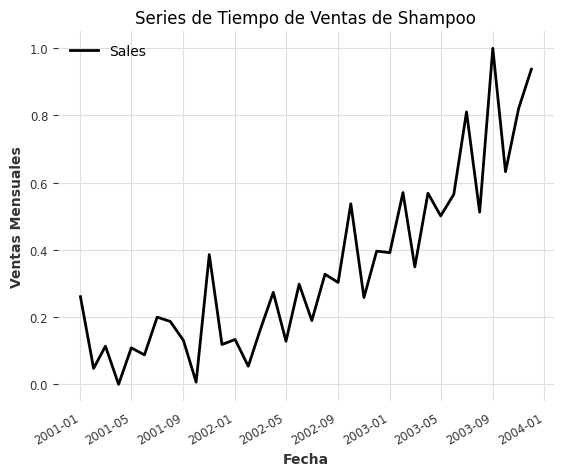

In [284]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_shampoo.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Shampoo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

-------
### Promedios
- Aplicar métodos de promedios y comparar los resultados con el conjunto original

Posteriormente, se generó una función para aplicar los métodos de promedios (Naive Moving Average, y Naive Mean). Se calculó el error de cada una de las predicciones. 

Naive Mean: This model has no parameter, and always predicts the mean value of the training series.

Naive Drift: This model fits a line between the first and last point of the training series, and extends it in the future.

In [359]:
from darts.models import NaiveMovingAverage, NaiveMean
from darts.metrics import rmse, mae, mape

def promedios(ts, text, N=0):
    N = int(len(ts)*0.2)
    train, val = ts[:-N], ts[-N:]

    # Crear el modelo NaiveMovingAverage
    model = NaiveMovingAverage()
    model.fit(train)
    prediction = model.predict(len(val)) 

    # Crear el modelo NaiveMean
    model2 = NaiveMean()
    model2.fit(train)
    prediction2 = model2.predict(len(val))

    # Error 
    rmse_score = rmse(val, prediction)
    mae_score = mae(val, prediction)
    print("RMSE (NaiveMovingAverage):", rmse_score)
    print("MAE (NaiveMovingAverage):", mae_score)

    rmse_score2 = rmse(val, prediction2)
    mae_score2 = mae(val, prediction2)
    print("\nRMSE (NaiveMean):", rmse_score2)
    print("MAE (NaiveMean):", mae_score2)

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction.plot(label='NaiveMovingAverage', ax=ax)
    prediction2.plot(label='NaiveMean', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.legend()
    plt.show()


En el caso de la serie de tiempo de nacimientos totales diarios, se puede observar lo siguiente:

- Las métricas de RMSE y MAE indican que el método de NaiveMovingAverage es mejor que el método de NaiveMean. Sin embargo, ambos métodos presentaron errores muy similares. 

- Este tipo de método es útil cuando se quiere predecir un valor en el futuro cercano. Sin embargo, no es útil cuando se quiere predecir un valor en el futuro lejano. Esto debido a que, como se puede observar en la gráfica, los métodos predicen un valor constante para todos los valores futuros.

RMSE (NaiveMovingAverage): 0.12846832134437308
MAE (NaiveMovingAverage): 0.10465753424657535

RMSE (NaiveMean): 0.1311044786124933
MAE (NaiveMean): 0.10608556952523927


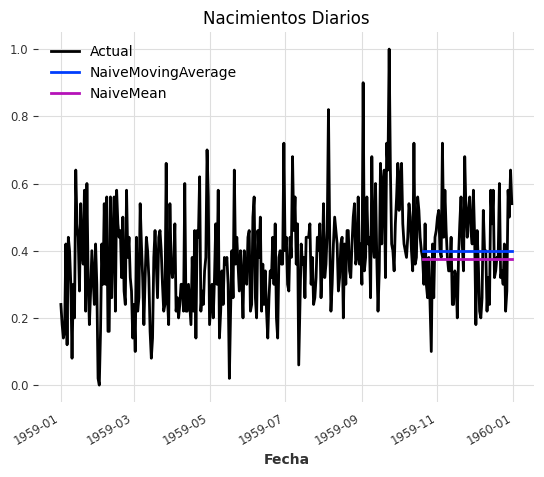

In [360]:
promedios(ts_births, "Nacimientos Diarios")

En el caso de la serie de tiempo de ventas de carros, se puede observar lo siguiente:
- El NaiveMovingAverage, debido a su funcionamiento, predice en base al promedio de los últimos valores. Ya que este dataset tiene una tendencia ascendente, el NaiveMovingAverage predijo valores más elevados. Esto tiene sentido, ya que sigue la tendencia ascendente de la serie de tiempo.

- En este caso, la estacionalidad hace que haya un sube y baja de precios. Como resultado, el Naive Moving Average intentó predecir los valores elevados de la "temporada" actual, mientras que NaiveMean predijo valores más bajos. Por tal razón se tienen errores relativamente similares. 

- Nuevamente, este tipo de método retorna una serie de predicciones constantes. Por lo que, no es útil cuando se quiere predecir un valor en el futuro lejano.

RMSE (NaiveMovingAverage): 0.2424320982172131
MAE (NaiveMovingAverage): 0.2060971678135966

RMSE (NaiveMean): 0.2657087354456908
MAE (NaiveMean): 0.19754377330053477


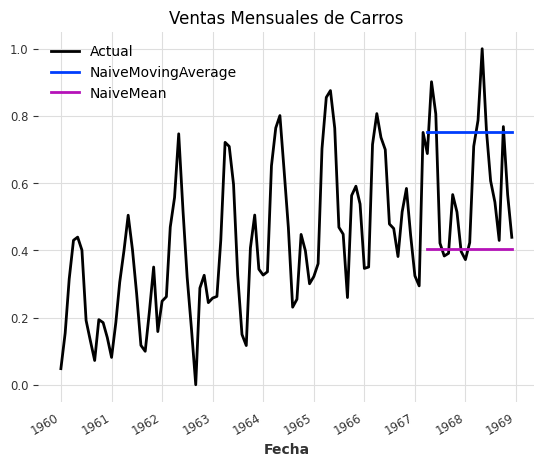

In [361]:
promedios(ts_car, "Ventas Mensuales de Carros")

En el caso de la serie de tiempo de temperatura promedio mensual, se puede observar lo siguiente:
- El NaiveMean sacó un error promedio más bajo de RMSE y MAE. El presente dataset no presenta tendencia, por lo cual los datos son estables. Como resultado, el NaiveMean logró predecir los futuros valores justo a la mitad.

- El modelo NaiveMovingAverage toma en consideración los últimos datos históricos. Ya que en este caso aparentemente hay más valores bajos que altos, el modelo predice valores bajos para el futuro.

RMSE (NaiveMovingAverage): 0.43740775296669354
MAE (NaiveMovingAverage): 0.3693181818181819

RMSE (NaiveMean): 0.23720192491639416
MAE (NaiveMean): 0.21089742641256315


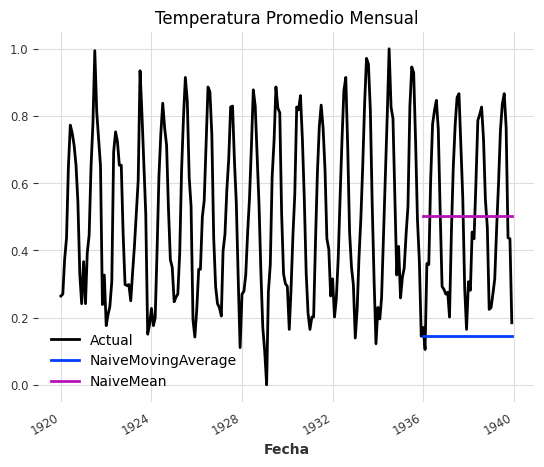

In [362]:
promedios(ts_temperature, "Temperatura Promedio Mensual")

En el caso de las ventas mensuales de shampoo, se puede observar lo siguiente:
- Debido a que el dataset presenta una tendencia ascendente, el método de Naive Mean no funcionó adecuadamente. Nuevamente, este método promedia todos los valores históricos, por lo cual no es capaz de seguir la última tendencia de los datos. 

- NaiveMovingAverage presentó muchísimo menos error debido a que sí fue capaz de detectar el último patrón y continuar con esa tendencia.

RMSE (NaiveMovingAverage): 0.3068391156302316
MAE (NaiveMovingAverage): 0.2530909644824697

RMSE (NaiveMean): 0.5385689751326049
MAE (NaiveMean): 0.5098640352067486


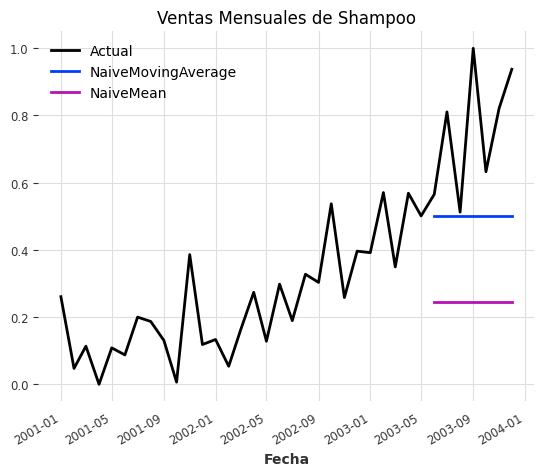

In [363]:
promedios(ts_shampoo, "Ventas Mensuales de Shampoo")

------
### SARIMA
- Identificar parámetros y ajustar un modelo SARIMA

Posteriormente, se generó una función para aplicar el método de SARIMA. Se calculó el error de cada una de las predicciones. 

In [364]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

def sarima(ts, text, N=0, fre=12):
    N = int(len(ts)*0.20)
    train, val = ts[:-N], ts[-N:]

    # Utilizar auto_arima para encontrar los mejores parámetros automáticamente
    # GRID SEARCH CV
    model = auto_arima(train.values(), seasonal=True, m=fre, suppress_warnings=True, stepwise=True, trace=True, verbose=0)
    
    # Ajustar el modelo SARIMA con los mejores parámetros encontrados
    model_sarima = SARIMAX(train.values(), order=model.order, seasonal_order=model.seasonal_order)
    model_sarima = model_sarima.fit(disp=False)

    # Predecir los valores
    prediction = model_sarima.forecast(steps=len(val))

    # Calcular RMSE y MAE
    rmse_val = np.sqrt(np.mean((val.values() - prediction) ** 2))
    mae_val = np.mean(np.abs(val.values() - prediction))
    print('RMSE = {:.2f}'.format(rmse_val))
    print('MAE = {:.2f}'.format(mae_val))

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='actual', ax=ax)
    ax.plot(val.time_index, prediction, label='forecast', color='orange')

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()

En el caso de SARIMA con daily-total-female-births, se puede observar lo sigueinte:

- A través de auto_arima, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Este dataset no presenta tendencia ni estacionalidad, por lo cual SARIMA (Seasonal Autoregressive Integrated Moving Average) no presenta gran ventaja para predecir valores de este. En realidad, generó un error similar a los métodos de promedios. 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-296.507, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-135.982, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-205.290, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-303.392, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-137.979, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-302.184, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-301.446, Time=0.42 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-301.523, Time=0.94 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-303.451, Time=0.34 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-301.454, Time=1.16 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-299.453, Time=0.90 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-134.933, Time=0.07 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-302.544, Time=0.81 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=-302.522, Time=0.37 sec
 ARIMA(1,1,2)(1,0,0

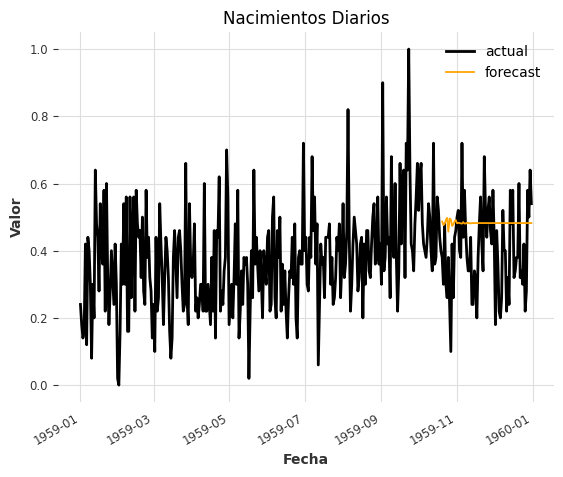

In [365]:
sarima(ts_births, "Nacimientos Diarios")

En el caso de SARIMA con ventas mensuales de carros, se puede observar lo sigueinte:

- A través de auto_arima, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Como se puede observar en la gráfica, este método presentó predicciones que más se acoplan a los valores reales. Sin embargo, el error de este método es muy similar al error de los métodos de promedios. Esto posiblemente se debe a que no se termina de acoplar 100% a la tendencia ascendente de la serie de tiempo.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-171.805, Time=0.82 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-155.945, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-174.943, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-173.025, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.534, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-160.713, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-173.818, Time=0.49 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-173.700, Time=0.38 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-175.416, Time=0.22 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-173.542, Time=0.50 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=-171.419, Time=0.56 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-169.462, Time=0.25 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-175.869, Time=0.28 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-167.536, Time=0.11 sec
 ARIMA(2,0,0)(1,1,1

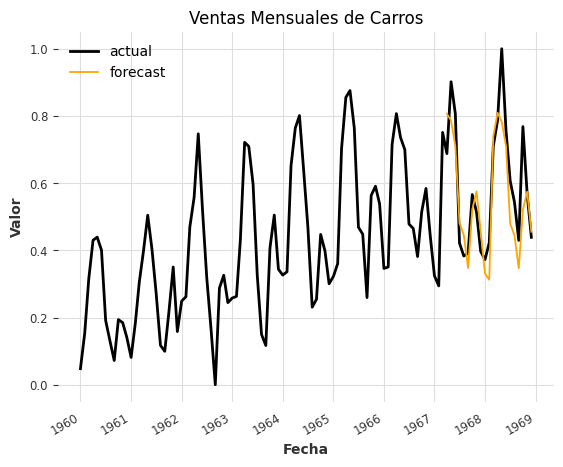

In [366]:
sarima(ts_car, "Ventas Mensuales de Carros")

En el caso de SARIMA con las temperaturas promedio mensuales, se puede observar lo sigueinte:

- A través de auto_arima, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Las predicciones generadas con el método de SARIMA se apegaron al patrón de la serie de tiempo original. Asimismo, presentó un error menor que con el método de Naive Moving Average, donde se tenía un RMSE de 0.4374 y un MAE de 0.3693.

- Este dataset funcionó mejor con SARIMA ya que presenta estacionalidad; elemento clave para usar SARIMA. Asimismo, ya que no presenta tendencia positiva ni negativa, fue más fácil para el modelo. 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-421.625, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7.800, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-339.389, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-202.896, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=322.995, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-407.964, Time=0.65 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-309.306, Time=0.75 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-442.141, Time=1.74 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-309.791, Time=0.73 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.71 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=-444.919, Time=1.51 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=-391.863, Time=1.83 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   :

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


RMSE = 0.35
MAE = 0.28


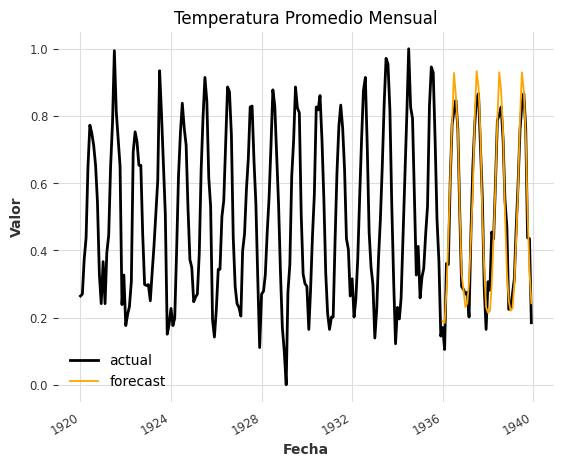

In [368]:
sarima(ts_temperature, "Temperatura Promedio Mensual")

En el caso de SARIMA con las ventas mensuales de shampoo, se puede observar lo sigueinte:

- A través de auto_arima, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- El método de SARIMA generó error incluso más alto que con Naive Moving Average. Esto se debe a que el presente dataset no presenta estacionalidad. Asimismo, presenta una tendencia ascendente, por lo cual SARIMA no fue capaz de predecir los valores futuros.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-37.297, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-19.127, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-38.799, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-21.047, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-34.995, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-36.822, Time=0.24 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-36.827, Time=0.20 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-38.674, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-34.845, Time=0.40 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-22.015, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-38.643, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-42.439, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-37.605, Time=0.05 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   

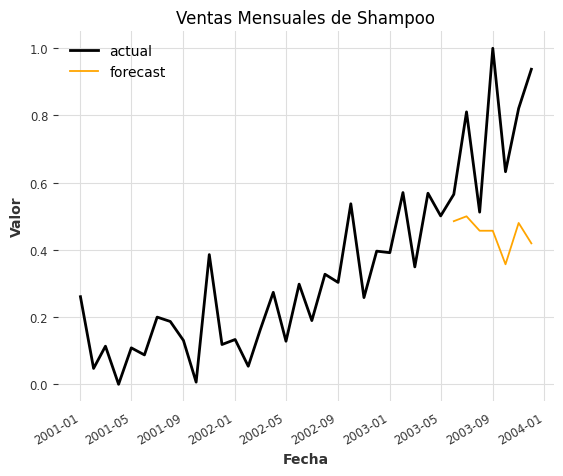

In [369]:
sarima(ts_shampoo, "Ventas Mensuales de Shampoo")

-------
### Alisamiento Exponencial:
- Aplicar diferentes métodos de alisamiento exponencial y comparar.

Método 1: Single Exponential Smoothing

- No implementa tendencia ni estacionalidad. 

RMSE = 6.64
MAE = 5.62


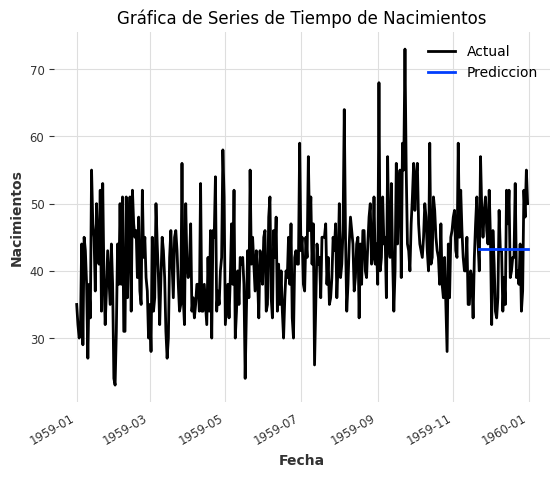

In [ ]:
from darts.models import ExponentialSmoothing

# Crear el modelo SIMPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend=None,               # No hay tendencia
    seasonal=None,            # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


Método 2: Double Exponential Smoothing

- Sí implementa tendencia pero no estacionalidad. 

RMSE = 6.65
MAE = 5.67


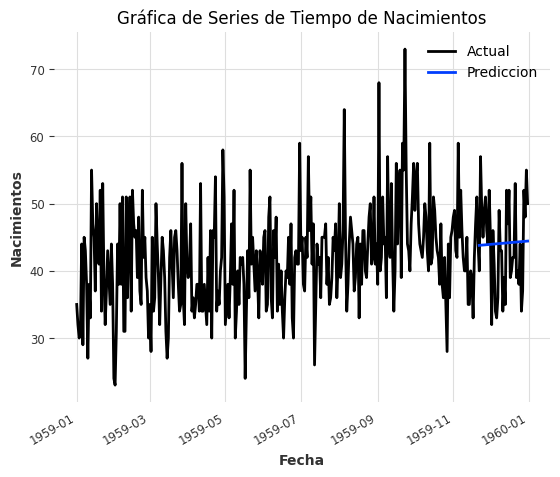

In [ ]:
from darts.utils.utils import ModelMode, SeasonalityMode

# Crear el modelo DOUBLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,              # Sí hay tendencia
    seasonal=None,                          # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


Método 3: Triple Exponential Smoothing (Holt-Winters' exponential smoothing)

- Sí implementa tendencia y estacionalidad. 

RMSE = 6.65
MAE = 5.47


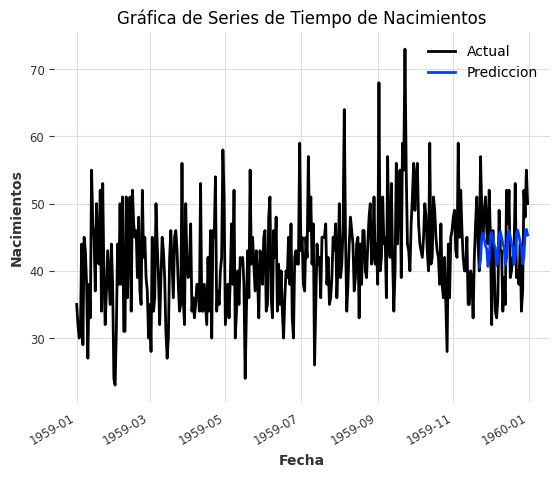

In [ ]:
# Crear el modelo TRIPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,                  # Sí hay tendencia
    seasonal=SeasonalityMode.MULTIPLICATIVE     # Sí hay estacionalidad
    #seasonal_periods                           # Inferido automáticamente
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


---------
### Prophet
- Utilizar Prophet para modelar la serie de tiempo.

12:32:23 - cmdstanpy - INFO - Chain [1] start processing
12:32:23 - cmdstanpy - INFO - Chain [1] done processing


RMSE = 7.02
MAE = 5.83


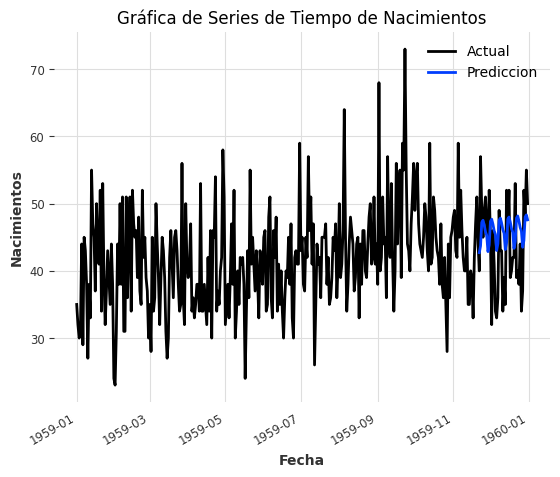

In [ ]:
from darts.models.forecasting.prophet_model import Prophet

# Crear el modelo
model = Prophet()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo

In [ ]:
from darts.models import RNNModel
from darts.utils.timeseries_generation import gaussian_timeseries

# Crear una serie de tiempo sintética (en caso de que no se tenga una serie real)
synthetic_ts = gaussian_timeseries(length=len(ts), freq='D', start_ts=ts.time_index[0])

rnn_model = RNNModel(input_chunk_length=32, output_chunk_length=10, n_epochs=100)
rnn_model.fit(synthetic_ts)
rnn_forecast = rnn_model.predict(forecast_horizon)

synthetic_ts.plot(label='Sintético')
rnn_forecast.plot(label='RNN Forecast')
plt.legend()
plt.show()


TypeError: gaussian_timeseries() got an unexpected keyword argument 'start_ts'

Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.
• Discutir cuál algoritmo se desempeña mejor para cada tipo de conjunto de datos y
por qué

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular métricas de evaluación para cada modelo
rmse_sarima = mean_squared_error(ts, sarima_forecast, squared=False)
mae_sarima = mean_absolute_error(ts, sarima_forecast)

rmse_rnn = mean_squared_error(synthetic_ts, rnn_forecast, squared=False)
mae_rnn = mean_absolute_error(synthetic_ts, rnn_forecast)

# Imprimir resultados
print(f'SARIMA RMSE: {rmse_sarima}, SARIMA MAE: {mae_sarima}')
print(f'RNN RMSE: {rmse_rnn}, RNN MAE: {mae_rnn}')
